In [1]:
import torch
import torchvision
from matplotlib import pyplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch import nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T
from PIL import Image

In [22]:
# Download and load the training data

# torchvision.transforms.ToTensor() converts image to tensor and rescale it from [0, 255] to [0, 1]
# torchvision.transforms.Normalize((0.5,), (0.5,))
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
trainset = torchvision.datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)

# Download and load the test data
testset = torchvision.datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)

In [23]:
# Data Loader
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=True)

In [ ]:
a = next(iter(trainloader))
print(a[0][0])

5


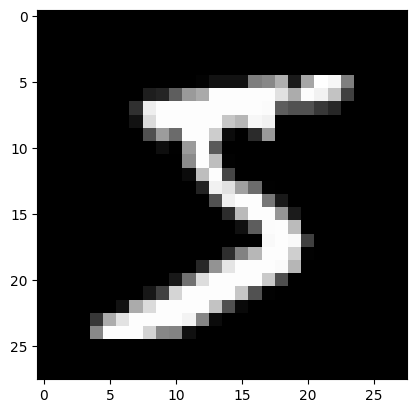

In [25]:
image, label = next(iter(trainset))
plt.imshow(image.squeeze(), cmap="gray")
print(label)

In [26]:
def flatten(x):
    N = x.shape[0] # read in N, C, H, W
    return x.view(N, -1)  # "flatten" the C * H * W values into a single vector per image

class VariationalAutoEncoder(nn.Module):
  def __init__(self, input_size, hidden_size, latent_size):
    super().__init__()
    self.linear_input_to_hidden = nn.Linear(input_size, hidden_size)
    self.tanh_input_to_hidden = nn.Tanh()

    self.hidden_to_mu = nn.Linear(hidden_size, latent_size)

    self.hidden_to_sigma = nn.Linear(hidden_size, latent_size)

    self.linear_latent_to_hidden = nn.Linear(latent_size, hidden_size)
    self.tanh_latent_to_hidden = nn.Tanh()

    self.linear_hidden_to_output = nn.Linear(hidden_size, input_size)
    self.sigmoid_hidden_to_output = nn.Sigmoid()
  
  def encoder(self, x):
    x = self.linear_input_to_hidden(x)
    out = self.tanh_input_to_hidden(x)

    mu = self.hidden_to_mu(out)

    sigma = self.hidden_to_sigma(out)

    return mu, sigma
  
  def decoder(self, z):
    out = self.linear_latent_to_hidden(z)
    out = self.tanh_latent_to_hidden(out)
    out = self.linear_hidden_to_output(out)
    out = self.sigmoid_hidden_to_output(out)
    return out
  
  def forward(self, img, num_samples=1):
    flatten_img = flatten(img)
    mu, sigma = self.encoder(flatten_img)
    # sample:
    epsilon = torch.randn_like(sigma)
    z = mu + sigma * epsilon
    out = self.decoder(z)
    return out, mu, sigma

In [46]:
def train_VAE(model, optimizer, epochs=1):
  for e in range(epochs):
    for t, (x, y) in enumerate(trainloader):

      model.train()
      x = x.to(DEVICE)
      out, mu, sigma = model(x)
      mse_loss = nn.MSELoss(reduction="sum")

      flatten_x = flatten(x)
      decoder_loss = mse_loss(out, flatten_x)

      encoder_loss = (-0.5) * torch.sum(1 + torch.log(sigma.pow(2)) - mu.pow(2) - sigma.pow(2))
      loss = (decoder_loss + 0.0001 * encoder_loss)

      if t % 100 == 0:
        print(f"Epoch {e}, batch {t}, loss: {loss}")
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

In [47]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
INPUT_DIM = 784
H_DIM = 200
LATENT_DIM = 20
NUM_EPOCHS = 10
LR_RATE = 1e-4

model = VariationalAutoEncoder(INPUT_DIM, H_DIM, LATENT_DIM).to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=LR_RATE)

train_VAE(model, optimizer, NUM_EPOCHS)

Epoch 0, batch 0, loss: 18215.35546875
Epoch 0, batch 100, loss: 6824.1259765625
Epoch 0, batch 200, loss: 5411.005859375
Epoch 0, batch 300, loss: 5435.42822265625
Epoch 0, batch 400, loss: 5563.390625
Epoch 0, batch 500, loss: 5184.314453125
Epoch 1, batch 0, loss: 5111.1279296875
Epoch 1, batch 100, loss: 5070.88818359375
Epoch 1, batch 200, loss: 5002.3828125
Epoch 1, batch 300, loss: 4971.70849609375
Epoch 1, batch 400, loss: 4754.57666015625
Epoch 1, batch 500, loss: 4859.71923828125
Epoch 2, batch 0, loss: 4543.33935546875
Epoch 2, batch 100, loss: 4455.41796875
Epoch 2, batch 200, loss: 4365.3310546875
Epoch 2, batch 300, loss: 4335.8056640625
Epoch 2, batch 400, loss: 4171.826171875
Epoch 2, batch 500, loss: 4110.5048828125
Epoch 3, batch 0, loss: 4011.24755859375
Epoch 3, batch 100, loss: 3677.91845703125
Epoch 3, batch 200, loss: 3737.913330078125
Epoch 3, batch 300, loss: 3606.94873046875
Epoch 3, batch 400, loss: 3446.43359375
Epoch 3, batch 500, loss: 3467.07373046875
Epo

True image: 


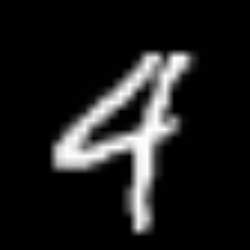

Fake image: 


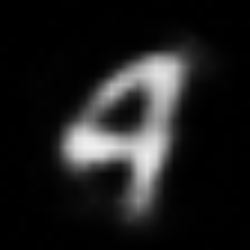

True image: 


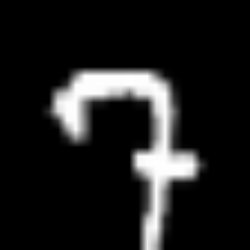

Fake image: 


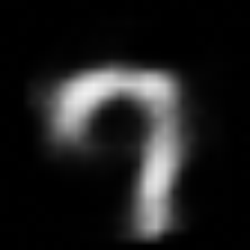

True image: 


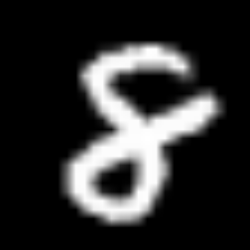

Fake image: 


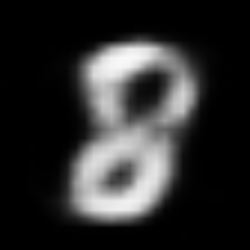

True image: 


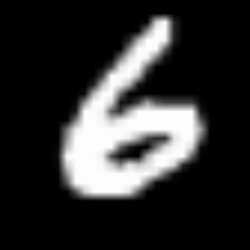

Fake image: 


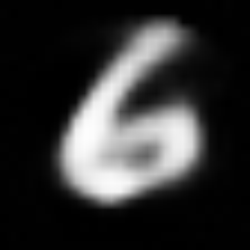

True image: 


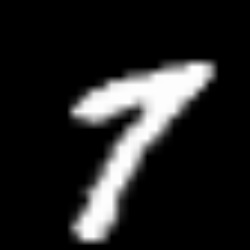

Fake image: 


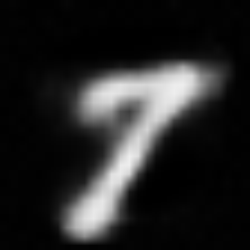

True image: 


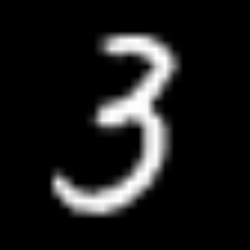

Fake image: 


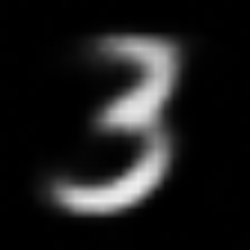

True image: 


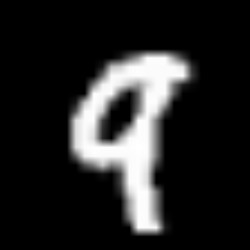

Fake image: 


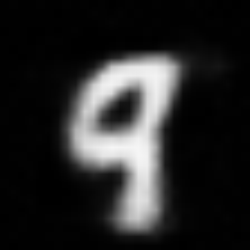

True image: 


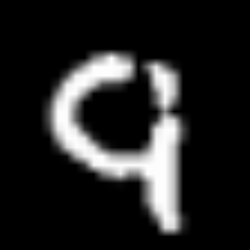

Fake image: 


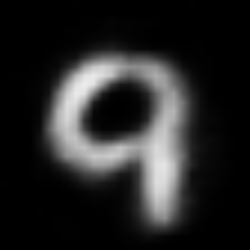

True image: 


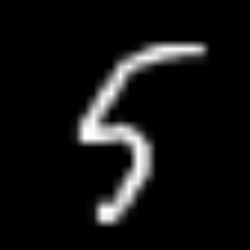

Fake image: 


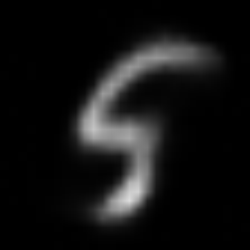

True image: 


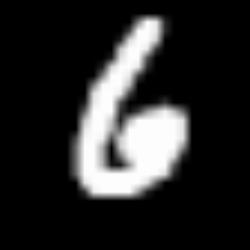

Fake image: 


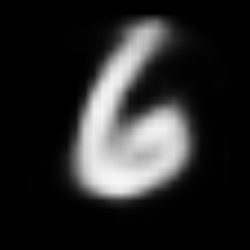

True image: 


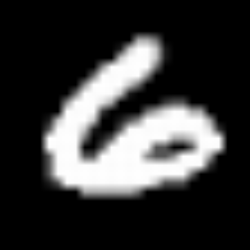

Fake image: 


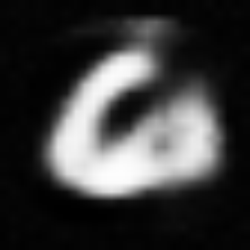

True image: 


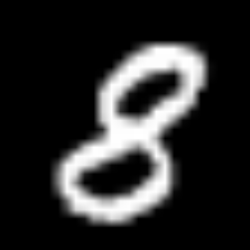

Fake image: 


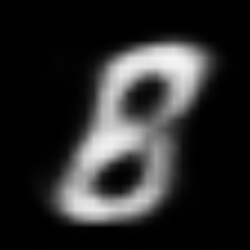

True image: 


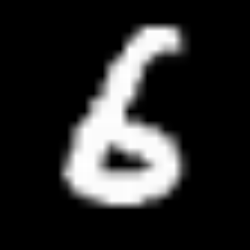

Fake image: 


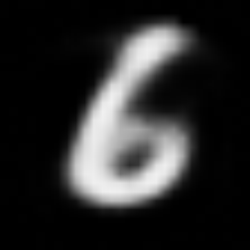

True image: 


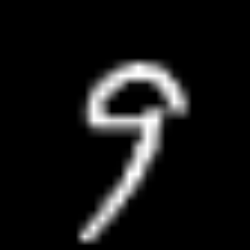

Fake image: 


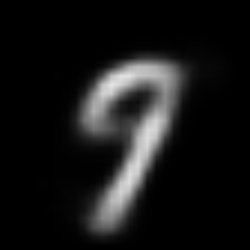

True image: 


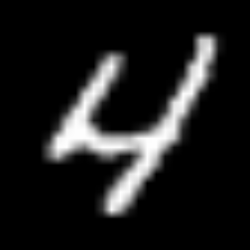

Fake image: 


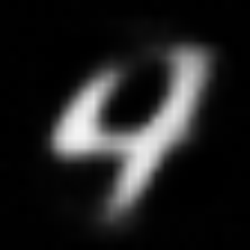

True image: 


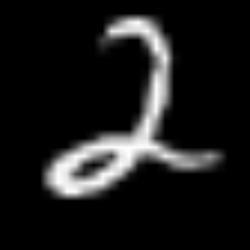

Fake image: 


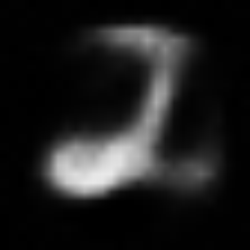

True image: 


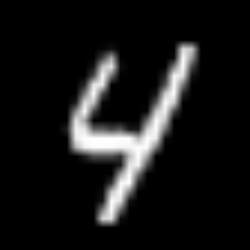

Fake image: 


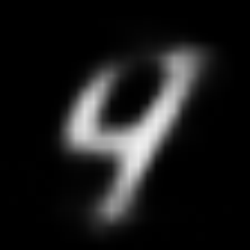

True image: 


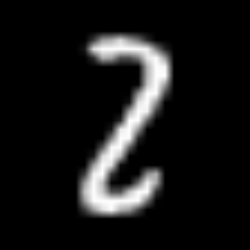

Fake image: 


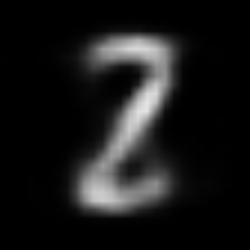

True image: 


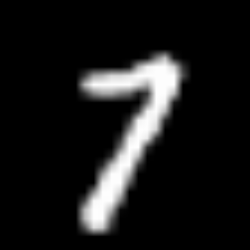

Fake image: 


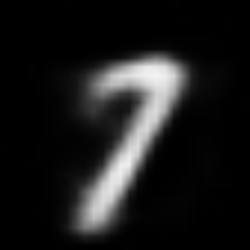

True image: 


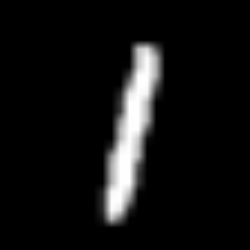

Fake image: 


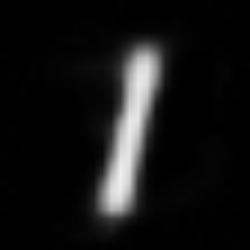

True image: 


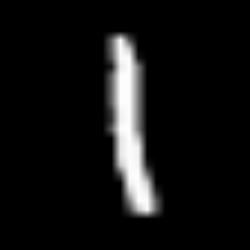

Fake image: 


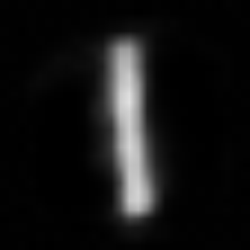

True image: 


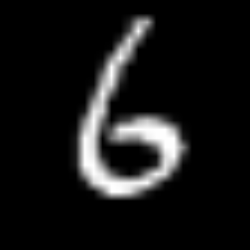

Fake image: 


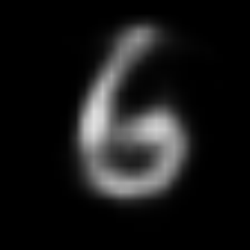

True image: 


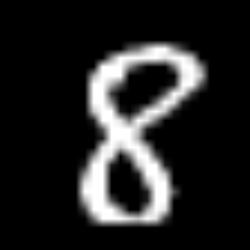

Fake image: 


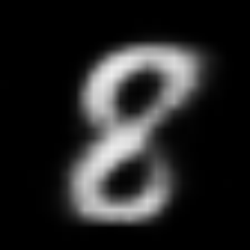

True image: 


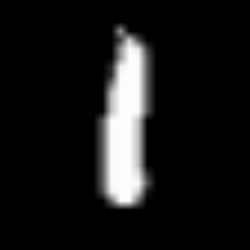

Fake image: 


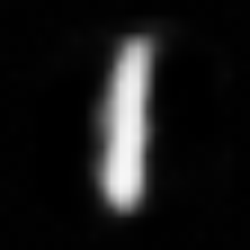

True image: 


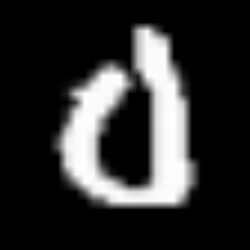

Fake image: 


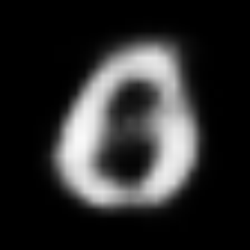

True image: 


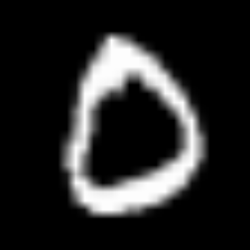

Fake image: 


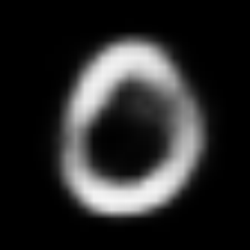

True image: 


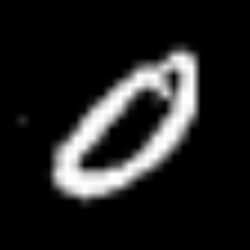

Fake image: 


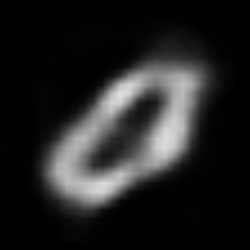

True image: 


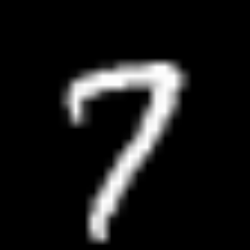

Fake image: 


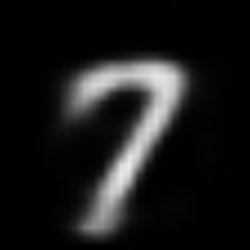

In [48]:
transform = T.ToPILImage()
resize_img = T.Resize(250)

with torch.no_grad():
  for i in range(28):
    tensor = a[0][i]
    img = transform(tensor)
    print("True image: ")
    display(resize_img(img))
    
    print("Fake image: ")
    out, mu, sigma = model(tensor)
    out = out.view(1, 28, 28)
    img = transform(out)
    display(resize_img(img))